In [2]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot
from scipy.special import rel_entr
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv(r'C:\Users\Syeda Nimrah\Downloads\NimrahFreelancing\OMAE_2022\OMAE_2022\cleaned_data3_training.csv')
print(df)

        RPM       WOB        ROP        Depth  Claystone  Sandstone  \
0     159.0  1.065942  15.313152  2715.454056        1.0        0.0   
1     159.0  1.973127  19.552920  2720.349144        1.0        0.0   
2     150.0  1.748599   7.768438  2361.839726        1.0        0.0   
3     151.0  1.065488  29.821632  2463.131472        1.0        0.0   
4     160.0  6.006017  11.083747  2898.409912        0.0        1.0   
...     ...       ...        ...          ...        ...        ...   
2265  149.0  2.499294  23.440644  2059.663750        1.0        0.0   
2266  150.0  3.558432  23.604017  2556.090290        1.0        0.0   
2267  100.0  5.574650  26.977848  2773.695240        1.0        0.0   
2268  159.0  5.583722  16.050768  2749.457544        1.0        0.0   
2269  160.0  4.440669  30.169104  2837.154600        0.0        1.0   

      Limestone       TRQ  
0           0.0  5.247015  
1           0.0  6.467252  
2           0.0  3.294638  
3           0.0  4.026779  
4      

In [7]:
p = df['WOB']
q = df['ROP']
r = df['TRQ']

In [8]:
print(p,q,r)

0       1.065942
1       1.973127
2       1.748599
3       1.065488
4       6.006017
          ...   
2265    2.499294
2266    3.558432
2267    5.574650
2268    5.583722
2269    4.440669
Name: WOB, Length: 2270, dtype: float64 0       15.313152
1       19.552920
2        7.768438
3       29.821632
4       11.083747
          ...    
2265    23.440644
2266    23.604017
2267    26.977848
2268    16.050768
2269    30.169104
Name: ROP, Length: 2270, dtype: float64 0       5.247015
1       6.467252
2       3.294638
3       4.026779
4       5.369039
          ...   
2265    4.026779
2266    5.491063
2267    7.687488
2268    5.613086
2269    9.883913
Name: TRQ, Length: 2270, dtype: float64


P=8686.586 Q=53878.946 R=13574.273


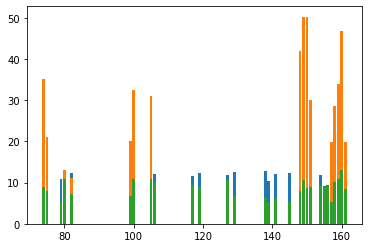

In [9]:
print('P=%.3f Q=%.3f R=%.3f'  % (sum(p), sum(q), sum(r)))


pyplot.bar(df['RPM'], p)

pyplot.bar(df['RPM'], q)

pyplot.bar(df['RPM'],r)

pyplot.show()

In [10]:
def kl_divergence(p, q):
    return sum(p[i] * math.log(p[i]/q[i],2) for i in range(len(p)))

In [11]:
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): -13985.017 bits
KL(Q || P): 176408.912 bits


In [25]:
kl_pq = kl_divergence(q, r)
print('KL(Q || R): %.3f bits' % kl_pq)
kl_qp = kl_divergence(r, q)
print('KL(R || Q): %.3f bits' % kl_qp)

KL(Q || R): 121301.328 bits
KL(R || Q): -22112.798 bits


In [26]:
kl_pq = kl_divergence(p, r)
print('KL(P || R): %.3f bits' % kl_pq)
kl_qp = kl_divergence(r, p)
print('KL(R || P): %.3f bits' % kl_qp)

KL(P || R): -3719.744 bits
KL(R || P): 11875.278 bits


In [28]:
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): -9693.675 nats
KL(Q || P): 122277.340 nats


In [29]:
kl_pq = rel_entr(p, r)
print('KL(P || R): %.3f nats' % sum(kl_pq))
kl_qp = rel_entr(r, p)
print('KL(R || P): %.3f nats' % sum(kl_qp))

KL(P || R): -2578.330 nats
KL(R || P): 8231.315 nats


In [30]:
kl_pq = rel_entr(q, r)
print('KL(Q || R): %.3f nats' % sum(kl_pq))
kl_qp = rel_entr(r, q)
print('KL(R || Q): %.3f nats' % sum(kl_qp))

KL(Q || R): 84079.674 nats
KL(R || Q): -15327.424 nats


In [12]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [13]:
def cross_entropy_cost(yHat, y):
    if y == 1:
        return -np.log(yHat)
    else:
        return -np.log(1 - yHat)

In [15]:
z = df['WOB']
h_z = sigmoid(z)

cost_1 = cross_entropy_cost(h_z, 1)
cost_0 = cross_entropy_cost(h_z, 0)

In [16]:
print(cost_1)
print(cost_0)

0       0.295950
1       0.130170
2       0.160432
3       0.296066
4       0.002461
          ...   
2265    0.078943
2266    0.028085
2267    0.003786
2268    0.003752
2269    0.011719
Name: WOB, Length: 2270, dtype: float64
0       1.361892
1       2.103296
2       1.909030
3       1.361555
4       6.008477
          ...   
2265    2.578237
2266    3.586517
2267    5.578436
2268    5.587474
2269    4.452388
Name: WOB, Length: 2270, dtype: float64


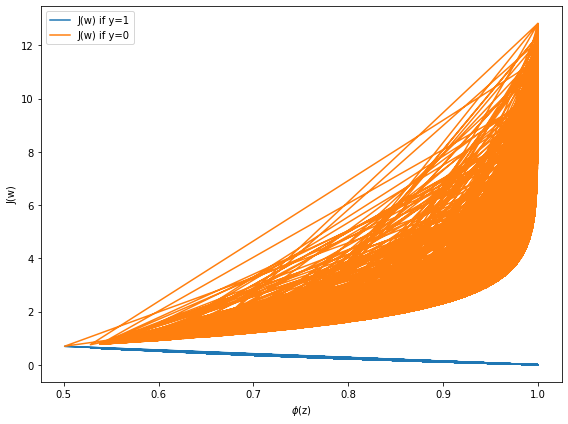

In [17]:
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [18]:
def Itakuro_Saito_distance():
    kl_pq = kl_divergence(p, q)
    kl_qp = kl_divergence(q, p)
    D = kl_pq + kl_qp
    print(D)

In [19]:
Itakuro_Saito_distance()

162423.89463296536
